## PCA- Dimension Reduction_feature extraction

In [62]:
## Example of PCA without using sklearn library

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body'])

In [29]:
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']

In [32]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,3


In [34]:
Y = df[['body']]
Y

,body
0,Skinny
1,Normal
2,Fat
3,Skinny


### 3. recaling feature vectors to all have the same scale

In [37]:
scaler = StandardScaler()

In [51]:
x_std = StandardScaler().fit_transform(X)
x_std

array([[-1.06754907,  0.        , -1.41421356, -1.        ,  0.4472136 ],
       [ 0.59886899,  0.        ,  0.        ,  1.        , -0.4472136 ],
       [ 1.32792689,  1.41421356,  1.41421356,  1.        , -1.34164079],
       [-0.85924681, -1.41421356,  0.        , -1.        ,  1.34164079]])

### 4. Covariance Matrix of features

In [43]:
features =x_std.T
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.33333333  1.03104357  1.1292382   1.28453059 -1.22654875]
 [ 1.03104357  1.33333333  0.66666667  0.94280904 -1.26491106]
 [ 1.1292382   0.66666667  1.33333333  0.94280904 -0.84327404]
 [ 1.28453059  0.94280904  0.94280904  1.33333333 -1.19256959]
 [-1.22654875 -1.26491106 -0.84327404 -1.19256959  1.33333333]]


### 5. Eigen Vectors and Eigen Values

In [45]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

In [46]:
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 0.48298439+0.00000000e+00j  0.17903216+0.00000000e+00j
  -0.15967571+0.00000000e+00j -0.68998368+0.00000000e+00j
  -0.68998368-0.00000000e+00j]
 [ 0.42226547+0.00000000e+00j -0.58513039+0.00000000e+00j
   0.47809839+0.00000000e+00j -0.16243241+2.19253052e-01j
  -0.16243241-2.19253052e-01j]
 [ 0.39130466+0.00000000e+00j  0.71274767+0.00000000e+00j
   0.5108641 +0.00000000e+00j  0.22866533-3.18498432e-17j
   0.22866533+3.18498432e-17j]
 [ 0.46013063+0.00000000e+00j  0.08441567+0.00000000e+00j
  -0.6963203 +0.00000000e+00j  0.20852455+1.55035320e-01j
   0.20852455-1.55035320e-01j]
 [-0.4728408 +0.00000000e+00j  0.33231712+0.00000000e+00j
   0.00902793+0.00000000e+00j -0.4576902 +3.46669513e-01j
  -0.4576902 -3.46669513e-01j]]


In [47]:
print('\nEigenvectors \n%s' %eig_vals)


Eigenvectors 
[5.57418352e+00+0.00000000e+00j 7.88170528e-01+0.00000000e+00j
 3.04312619e-01+0.00000000e+00j 6.77684198e-17+9.84833885e-17j
 6.77684198e-17-9.84833885e-17j]


In [48]:
eig_vals[0] / sum(eig_vals)

(0.8361275280106689+0j)

In [52]:
projected_X = x_std.dot(eig_vecs.T[0])

In [53]:
projected_X

array([-1.74058935+0.j,  0.96083584+0.j,  2.886443  +0.j, -2.10668949+0.j])

In [55]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0
result['label'] = Y

In [56]:
result.head(10)

,PC1,y-axis,label
0,-1.740589+0.000000j,0.0,Skinny
1,0.960836+0.000000j,0.0,Normal
2,2.886443+0.000000j,0.0,Fat
3,-2.106689+0.000000j,0.0,Skinny


/Users/minseokoh/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:620: ComplexWarning: Casting complex values to real discards the imaginary part
  xys = data[[x, y]].to_numpy().astype(float)
/Users/minseokoh/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:620: ComplexWarning: Casting complex values to real discards the imaginary part
  xys = data[[x, y]].to_numpy().astype(float)
/Users/minseokoh/anaconda3/lib/python3.11/site-packages/seaborn/regression.py:620: ComplexWarning: Casting complex values to real discards the imaginary part
  xys = data[[x, y]].to_numpy().astype(float)
/Users/minseokoh/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


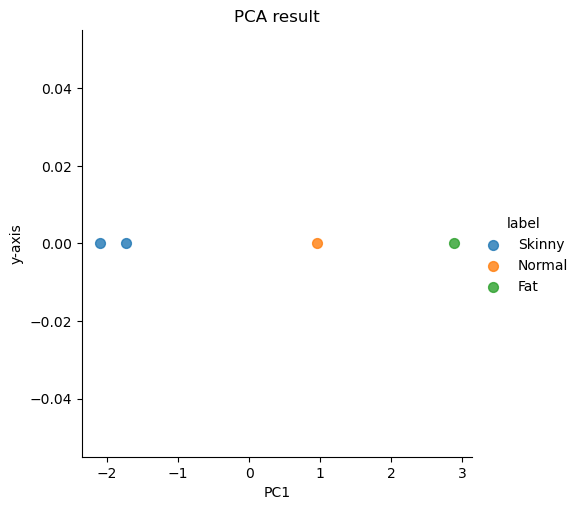

In [59]:
sns.lmplot(x='PC1', y='y-axis', data=result, fit_reg=False, scatter_kws={"s": 50}, hue="label")
plt.title('PCA result')
plt.show();